## Data Raw

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [29]:
os.getcwd()

'C:\\Users\\kurni\\sentiment_analysis_1'

In [3]:
data = pd.read_csv(r"data\financial_news_data.csv",encoding = "ISO-8859-1")
test = pd.read_csv(r"data\data_for_test_the_model.csv",encoding = "ISO-8859-1")
data.head()

,sentiment,news_headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
#Check if there's NA in train data
data.isnull().sum().sum()

0

In [5]:
#Check the data information, there's a duplicate row hence the duplicate rows will be dropped
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      4843 non-null   object
 1   news_headline  4843 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


,sentiment,news_headline
count,4843,4843
unique,3,4835
top,neutral,The issuer is solely responsible for the conte...
freq,2878,2


In [6]:
data.drop_duplicates(subset=['news_headline'],keep='first',inplace=True)
data.describe()

,sentiment,news_headline
count,4835,4835
unique,3,4835
top,neutral,"According to Gran , the company has no plans t..."
freq,2871,1


In [7]:
#Check sentiment proportion
data['sentiment'].value_counts()

neutral     2871
positive    1361
negative     603
Name: sentiment, dtype: int64

## EDA

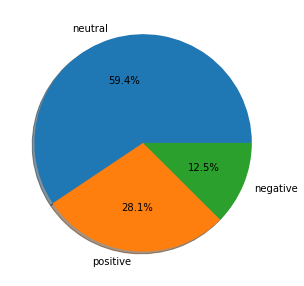

In [8]:
len1 = len(data["sentiment"][data.sentiment=="neutral"])
len2 = len(data["sentiment"][data.sentiment=="positive"])
len3 = len(data["sentiment"][data.sentiment=="negative"])

arr = np.array([len1,len2,len3])
labels = ['neutral','positive','negative']

# Creating plot
fig = plt.figure(figsize =(10, 5))
plt.pie(arr, labels=labels, shadow=True, autopct='%1.1f%%')

# show plot, #Data shows imbalance data
plt.show()

<AxesSubplot:>

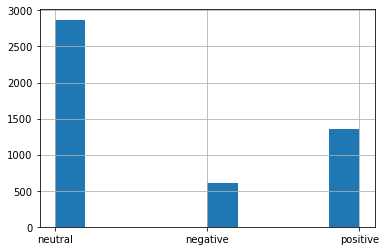

In [9]:
data.sentiment.hist()

Sentiment frequency to see the probability (converge the data)

<AxesSubplot:>

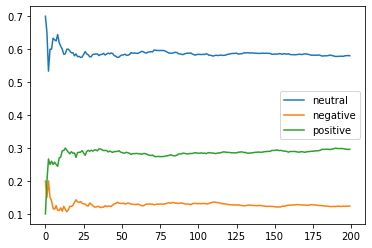

In [10]:
d={'neutral':0,'negative':0,'positive':0}
freq=pd.DataFrame(columns=['neutral','negative','positive'])
for _ in range(200):
    tmp=data.sample(10)
    for sent in tmp.sentiment.unique(): d[sent]+=tmp.sentiment.value_counts().loc[sent]
    cumFreq=sum(d.values())
    freq=freq.append(pd.DataFrame([[d['neutral']/cumFreq,d['negative']/cumFreq,d['positive']/cumFreq]],columns=['neutral','negative','positive']))
freq.reset_index(drop=True).plot()

## Label Encoding

In [11]:
from sklearn import preprocessing

train = data
label_encoder = preprocessing.LabelEncoder()
train["sentiment_label"] = label_encoder.fit_transform(train['sentiment'])
train.head()

,sentiment,news_headline,sentiment_label
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


## Data Split

In [12]:
train1,eva = train_test_split(train,test_size = 0.2)

## Build the Model

In [13]:
#!pip install simpletransformers
#!pip install torch

Buid the model using BERT

In [14]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [15]:
train1

,sentiment,news_headline,sentiment_label
3633,negative,in Finland Finnish pharmaceutical company Orio...,0
2906,neutral,Finnish real estate company Sponda Oyj said on...,1
416,neutral,"ALEXANDRIA , Va. , March 28 -- Pertti Salmi an...",1
2525,neutral,"No price was given for the transaction , which...",1
2572,neutral,"Stora Enso , a global paper , packaging and wo...",1
...,...,...,...
1254,neutral,"In the survey , Goodyear is the third most val...",1
2091,positive,Diluted loss per share stood at EUR 0.15 versu...,2
1392,neutral,The Kyroskoski investment is to be completed i...,1
750,positive,Finnish electronics manufacturing services com...,2


In [16]:
train_df = pd.DataFrame({
    'news': train1['news_headline'][:1500].replace(r'\n', ' ', regex=True),
    'sentiment_label': train1['sentiment_label'][:1500]
})

eval_df = pd.DataFrame({
    'news': eva['news_headline'][-400:].replace(r'\n', ' ', regex=True),
    'sentiment_label': eva['sentiment_label'][-400:]
})

In [17]:
model.train_model(train_df)

  0%|          | 0/1500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.6566066338502347)

In [18]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

## Model Evaluation

In [19]:
result

{'mcc': 0.7037403868379295, 'eval_loss': 0.5035936802625656}

In [20]:
model_outputs

array([[-0.26595649,  0.07704315, -0.94243586],
       [ 1.37284672, -1.09741521, -1.30091012],
       [-1.33042288, -0.98058444,  2.44094062],
       ...,
       [-0.71041489, -1.39448583,  2.62367058],
       [-1.60265267,  2.07881689, -0.68434811],
       [-1.92096198,  2.10929823, -0.37778324]])

In [21]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [22]:
true = eval_df['sentiment_label'].tolist()
predicted = lst

In [23]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 54,   5,   1],
       [ 11, 189,  35],
       [  6,  13,  86]], dtype=int64)

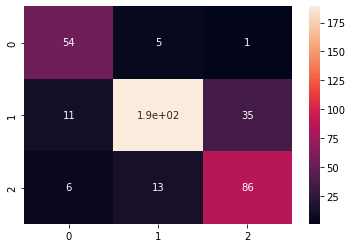

In [24]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [25]:
sklearn.metrics.classification_report(true,predicted,target_names=['negative','neutral','positive'])

'              precision    recall  f1-score   support\n\n    negative       0.76      0.90      0.82        60\n     neutral       0.91      0.80      0.86       235\n    positive       0.70      0.82      0.76       105\n\n    accuracy                           0.82       400\n   macro avg       0.79      0.84      0.81       400\nweighted avg       0.84      0.82      0.82       400\n'

The model accuracy was given with the value below

In [26]:
sklearn.metrics.accuracy_score(true,predicted)

0.8225

## Predict the News Headline Sentiment (Test Data)

In [27]:
def get_result(news):
    for i in range(len(news)):
        result = model.predict([news.news_headline[i]])
        pos = np.where(result[1][0] == np.amax(result[1][0]))
        pos = int(pos[0])
        sentiment_dict = {0:'negative',1:'neutral',2:'positive'}
        
        news.predicted[i] = sentiment_dict[pos]
    return

In [28]:
test['predicted'] = "a"
get_result(test)
test.head()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

,number,news_headline,predicted
0,1,The 2015 target for net sales has been set at ...,neutral
1,2,It holds 38 percent of Outokumpu 's shares and...,negative
2,3,"As a result of these transactions , the aggreg...",negative


Save the test prediction into csv file

In [37]:
test.to_csv(r'C:\Users\kurni\sentiment_analysis_1\Assignment Results\test prediction.csv')

### The test data news output sentiment prediction from the model are neutral, negative, negative